In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import os

SAVE_PATH = 'report/figs/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
plt.rcParams['figure.figsize'] = [4, 4]

# Задание 1

In [2]:
gamma = 0.25
x_0 = 1
theta_hat_0 = 1
g_t = lambda t: 0 * t

theta = 8
lambda_ = 2

In [3]:
def delta(t, theta):
    return (1 + t)**(-1/8) * (1 - theta * (1 + t)**(-1/4) - (3/8) * (1 + t)**(-5/4)) 

def d_xm(t, x_m, lambda_, g_t):
    return - lambda_ * x_m + lambda_ * g_t(t)

def u_func(t, x, theta, g_t, lambda_):
    return - theta * x - lambda_ * x + lambda_ * g_t(t)

def d_x(t, x, lambda_, g_t, theta, theta_hat):
    return theta * x + u_func(t, x, theta_hat, g_t, lambda_) + delta(t, theta)

def d_theta_hat(x, epsilon, gamma):
    return -gamma * epsilon * x

In [4]:
def system(t, y, lambda_, g_t, gamma, theta):
    x_m, x, theta_hat = y
    return (
        d_xm(t, x_m, lambda_, g_t),
        d_x(t, x, lambda_, g_t, theta, theta_hat),
        d_theta_hat(x, x_m - x, gamma)
    )

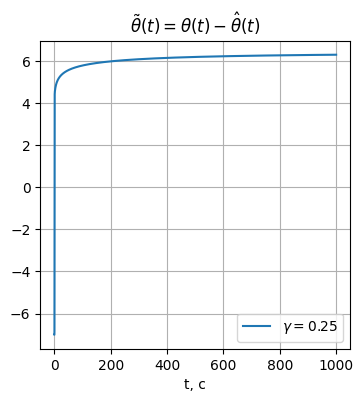

In [5]:
t_span = [0, 1000]
num_points = 10 * t_span[-1]
sol_1 = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, num_points), y0=np.array([x_0, x_0, theta_hat_0]).T, args=(lambda_, g_t, gamma, theta))

xm, x, theta_hat = sol_1.y
t = sol_1.t

plt.plot(sol_1.t, (theta_hat - theta), label=f'$\gamma = {gamma}$')

plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\tilde \\theta(t) = \\theta(t) - \\hat \\theta(t)$')
plt.savefig(SAVE_PATH + '1_big_theta_e.png')

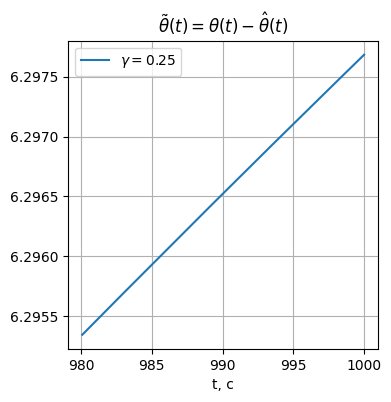

In [6]:
plt.plot(sol_1.t[-200:], (theta_hat - theta)[-200:], label=f'$\gamma = {gamma}$')

plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\tilde \\theta(t) = \\theta(t) - \\hat \\theta(t)$')
plt.savefig(SAVE_PATH + '1_small_theta_e.png')

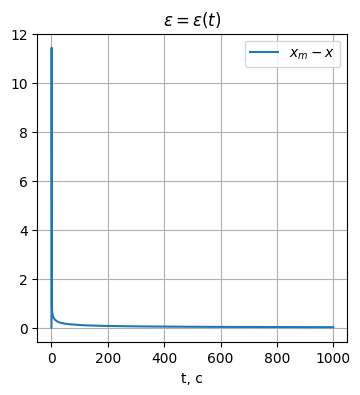

In [7]:
plt.plot(sol_1.t, xm - x, label='$x_m - x$')
# plt.plot(sol_xm.t, sol_xm.y[0], label='$x$')
plt.legend()
plt.grid()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')
plt.savefig(SAVE_PATH + '1_epsilon.png')

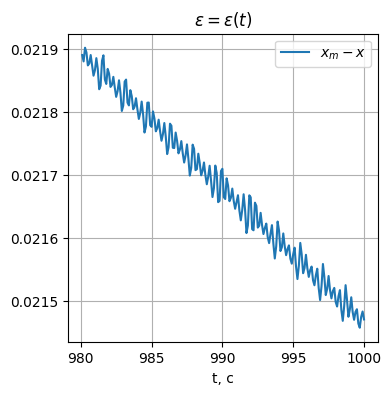

In [8]:
plt.plot(sol_1.t[-200:], (xm - x)[-200:], label='$x_m - x$')
# plt.plot(sol_xm.t, sol_xm.y[0], label='$x$')
plt.legend()
plt.grid()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')
plt.savefig(SAVE_PATH + '1_epsilon_small.png')

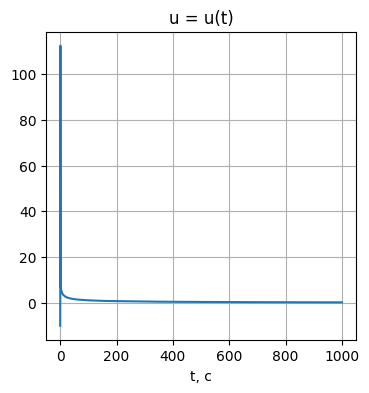

In [9]:
u = - theta * x - lambda_ * x + lambda_ * g_t(x)
plt.plot(sol_1.t, u.T)
plt.grid()
plt.xlabel('t, c')
plt.title('u = u(t)')
plt.savefig(SAVE_PATH + '1_u.png')

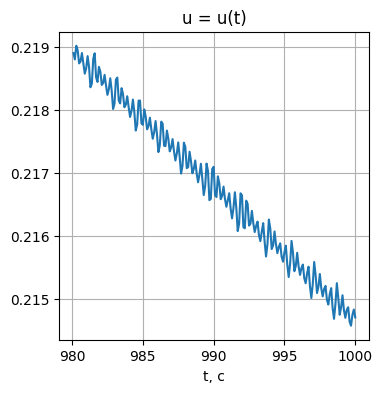

In [10]:
u = - theta * x - lambda_ * x + lambda_ * g_t(x)
plt.plot(sol_1.t[-200:], u.T[-200:])
plt.grid()
plt.xlabel('t, c')
plt.title('u = u(t)')
plt.savefig(SAVE_PATH + '1_u_small.png')

# Задание 2

In [11]:
def f_theta_hat(x, epsilon, gamma):
    return -gamma * epsilon * x

def system(t, y, lambda_, g_t, gamma, theta):
    x_m, x = y
    return (
        d_xm(t, x_m, lambda_, g_t),
        d_x(t, x, lambda_, g_t, theta, f_theta_hat(x, x_m - x, gamma))
    )
g_t = lambda t: np.cos(4 * t)

In [12]:
t_span = [0, 1000]
num_points = 10 * t_span[-1]
gammas = [0.25, 100, 1000]
solutions = {}

for gamma in gammas:
    solutions[gamma] = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, num_points), y0=np.array([x_0, x_0]).T, args=(lambda_, g_t, gamma, theta))


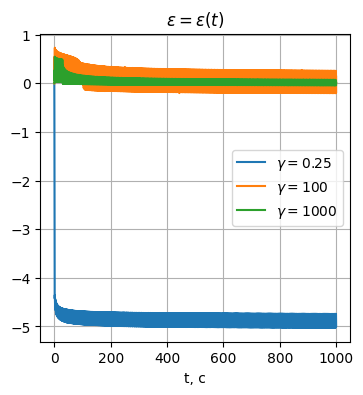

In [13]:
for gamma in gammas:
    plt.plot(solutions[gamma].t, (solutions[gamma].y[0] - solutions[gamma].y[1]), label=f'$\gamma = {gamma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')


plt.savefig(SAVE_PATH + '2_epsilon.png')

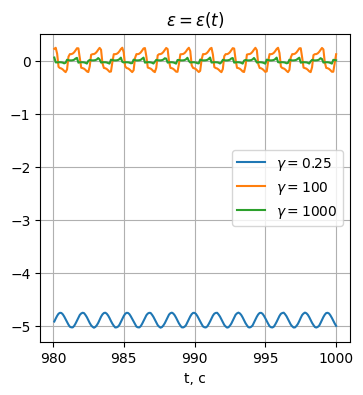

In [14]:
for gamma in gammas:
    plt.plot(solutions[gamma].t[-200:], (solutions[gamma].y[0] - solutions[gamma].y[1])[-200:], label=f'$\gamma = {gamma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')


plt.savefig(SAVE_PATH + '2_epsilon_small.png')

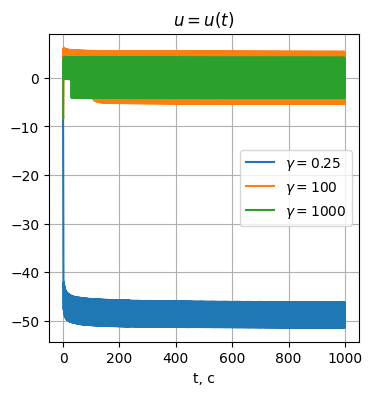

In [15]:
for gamma in gammas:
    x = solutions[gamma].y[1]
    t = solutions[gamma].t
    plt.plot(t, u_func(t, x, theta, g_t, lambda_), label=f'$\gamma = {gamma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$u = u(t)$')


plt.savefig(SAVE_PATH + '2_u.png')

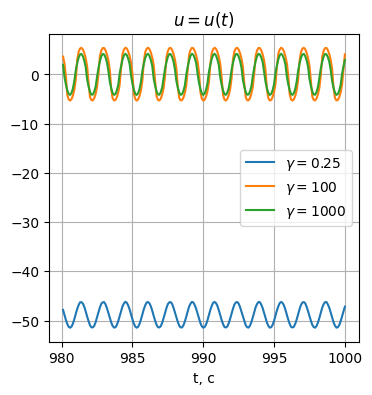

In [16]:
for gamma in gammas:
    x = solutions[gamma].y[1][-200:]
    t = solutions[gamma].t[-200:]
    plt.plot(t, u_func(t, x, theta, g_t, lambda_), label=f'$\gamma = {gamma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$u = u(t)$')


plt.savefig(SAVE_PATH + '2_u_small.png')

# Задание 3

In [17]:
def d_theta_hat(x, epsilon, gamma, sigma, theta_hat):
    return -gamma * epsilon * x - sigma * theta_hat

def system(t, y, lambda_, g_t, gamma, theta, sigma):
    x_m, x, theta_hat = y
    return (
        d_xm(t, x_m, lambda_, g_t),
        d_x(t, x, lambda_, g_t, theta, theta_hat),
        d_theta_hat(x, x_m - x, gamma, sigma, theta_hat)
    )

In [23]:
gamma = 0.25
sigmas = [0, 0.1, 1, 10]
solutions_3 = {}
for sigma in sigmas:
    solutions_3[sigma] = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=np.array([x_0, x_0, theta_hat_0]).T, args=(lambda_, g_t, gamma, theta, sigma))

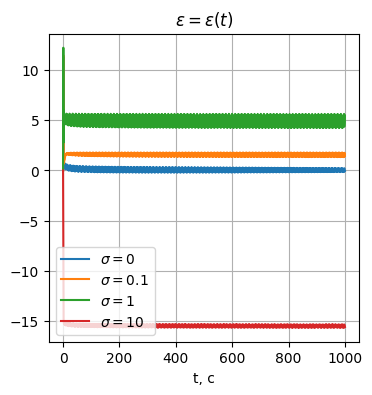

In [24]:
for sigma in sigmas:
    plt.plot(solutions_3[sigma].t, (solutions_3[sigma].y[0] - solutions_3[sigma].y[1]), label=f'$\sigma = {sigma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\varepsilon = \\varepsilon(t)$')


plt.savefig(SAVE_PATH + '3_epsilon.png')

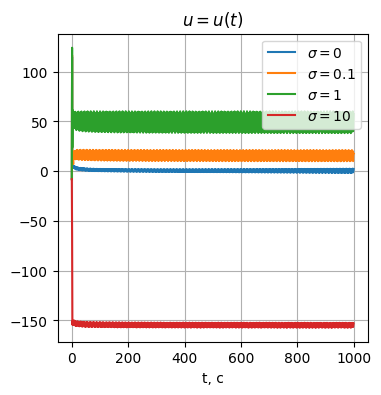

In [25]:
for sigma in sigmas:
    x = solutions_3[sigma].y[1]
    t = solutions_3[sigma].t
    plt.plot(t, u_func(t, x, theta, g_t, lambda_), label=f'$\sigma = {sigma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$u = u(t)$')


plt.savefig(SAVE_PATH + '3_u.png')

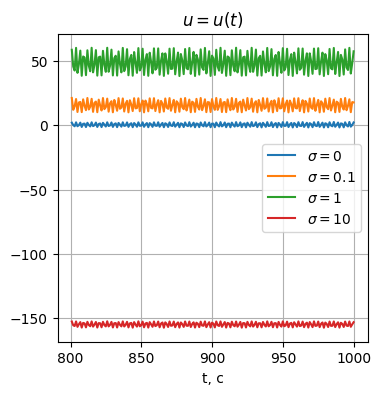

In [26]:
for sigma in sigmas:
    x = solutions_3[sigma].y[1][-200:]
    t = solutions_3[sigma].t[-200:]
    plt.plot(t, u_func(t, x, theta, g_t, lambda_), label=f'$\sigma = {sigma}$')
plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$u = u(t)$')


plt.savefig(SAVE_PATH + '3_u_small.png')

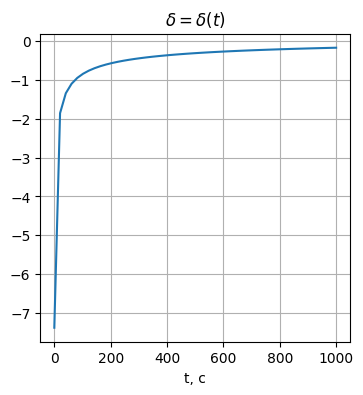

In [27]:
plt.plot(np.linspace(0, 1000), delta(np.linspace(0, 1000), theta))
plt.grid()
plt.xlabel('t, c')
plt.title('$\delta = \delta(t)$')
plt.savefig(SAVE_PATH + 'delta.png')